In [6]:
import lasio
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prov import identifier


import view_well_file
import interpolation

# Стандартная загрузка всех файлов 

In [7]:
import importlib
importlib.reload(view_well_file)


<module 'view_well_file' from 'C:\\Users\\1\\Downloads\\view_well_file.py'>

In [8]:
DATA_DIR = "..\\data\\las"
EXCEL_DIR = "..\\data"

In [9]:
well_idx = []

In [10]:
for filename in os.listdir(DATA_DIR):
    # Print each filename
    well_idx.append(filename.split("_")[0])
    print(filename)

12_continuous.las
12_discrete.las
13_continuous.las
13_discrete.las
14_continuous.las
14_discrete.las
15_continuous.las
15_discrete.las
16_continuous.las
16_discrete.las
17_continuous.las
17_discrete.las
18_continuous.las
18_discrete.las
19_continuous.las
19_discrete.las
20_continuous.las
20_discrete.las
22_continuous.las
22_discrete.las
23_continuous.las
23_discrete.las
24_continuous.las
24_discrete.las
25_continuous.las
25_discrete.las
26_continuous.las
26_discrete.las
27_continuous.las
27_discrete.las
28_continuous.las
28_discrete.las
29_continuous.las
29_discrete.las
30_continuous.las
30_discrete.las
31_continuous.las
31_discrete.las
33_continuous.las
33_discrete.las
34_continuous.las
34_discrete.las
35_continuous.las
35_discrete.las
36_continuous.las
36_discrete.las
37_continuous.las
37_discrete.las
38_continuous.las
38_discrete.las
39_continuous.las
39_discrete.las
40_continuous.las
40_discrete.las
41_continuous.las
41_discrete.las
42_continuous.las
42_discrete.las
43_continuous.

In [11]:
well_idx = set(well_idx)

In [12]:
len(well_idx)

41

In [13]:
type(list(well_idx)[0])

str

In [14]:
excel = pd.read_excel(EXCEL_DIR + "\\Отбивки пласта АС11-2.xlsx")

In [15]:
upper_bounds = excel.iloc[::2].copy()
upper_bounds.rename(columns={'Z': 'upper'}, inplace=True)
upper_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [16]:
lower_bounds = excel.iloc[1::2].copy()
lower_bounds.rename(columns={'Z': 'lower'}, inplace=True)
lower_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [17]:
target_layers = pd.merge(upper_bounds, lower_bounds, on='Well identifier', how='outer')
target_layers['Well identifier'] = target_layers['Well identifier'].astype(str)
target_layers = target_layers[target_layers['Well identifier'].isin(well_idx)]


In [18]:
target_layers

,Well identifier,upper,lower
1,12,-2161.95,-2183.98
2,13,-2158.72,-2175.36
3,14,-2170.38,-2190.59
4,15,-2170.84,-2188.69
5,16,-2157.70,-2178.94
6,17,-2150.80,-2171.09
7,18,-2146.87,-2167.39
8,19,-2129.24,-2150.87
9,20,-2141.56,-2162.04
10,22,-2129.92,-2146.85


In [19]:
target_layers.iloc[30]

Well identifier         44
upper             -2128.99
lower             -2145.62
Name: 32, dtype: object

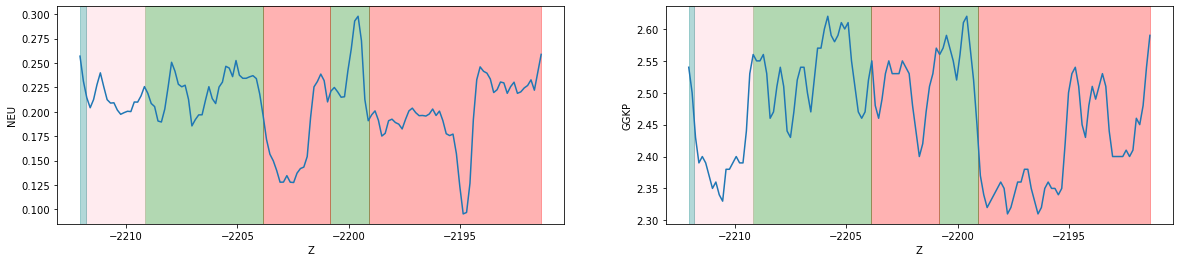

In [20]:
z, ggkp, neu = view_well_file.view_well(20, target_layers)

In [21]:
z.shape

(137,)

In [22]:
z_interp, ggkp_interp = interpolation.interpolate_lin(z, ggkp, 200)

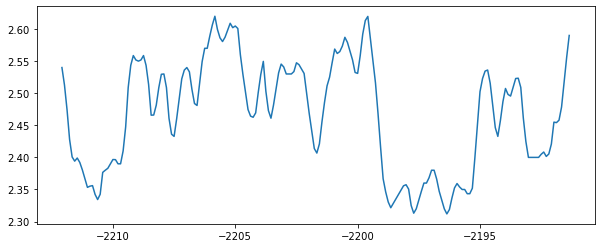

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(z_interp, ggkp_interp)
plt.show()

189.1076115485545


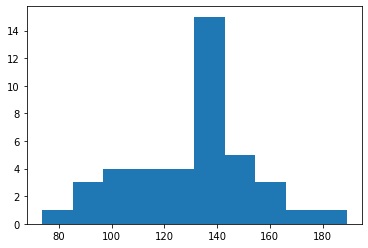

In [24]:
plt.hist((target_layers.upper - target_layers.lower) / 0.1524)
print(max((target_layers.upper - target_layers.lower) / 0.1524))
plt.show()

In [39]:
##Сначала немного обработаем кривые: разделим кривую на 100 точек

In [25]:
data_ = []
z_ = []
for well_index in range(len(well_idx)):
    las = lasio.read(os.path.join(DATA_DIR, f"{target_layers.iloc[well_index]['Well identifier']}_continuous.las"))
    target_layer_idx = np.where((las['Z'] < target_layers.iloc[well_index].upper) & (las['Z'] > target_layers.iloc[well_index].lower))
    data_interp = interpolation.interpolate_lin(las["Z"][target_layer_idx], las["GGKP"][target_layer_idx], 100)
    data_.append(data_interp[1])
    z_.append(data_interp[0])

data = np.empty(len(data_), dtype=object)
z = np.empty(len(z_), dtype=object)
for i, sublist in enumerate(data_):
    data[i] = np.array(sublist)
for i, sublist in enumerate(z_):
    z[i] = np.array(sublist)    
data = np.vstack(data)
z = np.vstack(z)

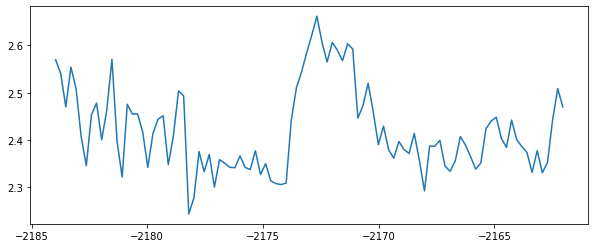

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(z[0], data[0])
plt.show()

In [ ]:
##Посчитаем  градиенты этих массивов

In [27]:
data_grad = np.gradient(data, axis = 1)

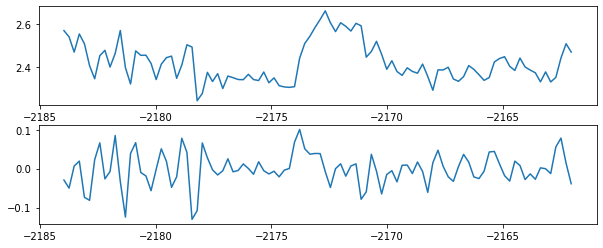

In [28]:
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(z[0], data[0])
plt.subplot(2, 1, 2)
plt.plot(z[0], data_grad[0])
plt.show()

In [29]:
split_points = []
for i in range(len(data[0])):
    if np.abs(data_grad[0][i]) > 0.005:
        split_points.append(0)
    else:
        split_points.append(1)
print(split_points)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [ ]:
## Разделим массив: линии раздела проходят по тем точкам, где градиент зануляется (очень мал, меньше 0.005)

In [30]:
data_redone = []
for i in range(len(data[0])):
    if np.abs(data_grad[0][i]) > 0.005:
        data_redone.append(data[0][i])
    else:
        data_redone.append(0)

from itertools import takewhile  
def split0(a): 
    it = iter(a) 
    return [[x for x in takewhile(bool, it)] for _ in range(a.count(0) + 1)]

data_redone = split0(data_redone)

data_new= np.empty(len(data_redone), dtype=object)
for i, sublist in enumerate(data_redone):
    data_new[i] = np.array(sublist)  
print(data_new)
print(data_new.shape)

[array([2.57      , 2.5406919 , 2.47      , 2.55415141, 2.5086162 ,
        2.40691902, 2.34584859, 2.45304841, 2.47830282, 2.40047625,
        2.46351228, 2.57044368, 2.3973627 , 2.32153648, 2.47553719,
        2.45486173, 2.4554556 , 2.41731879])
 array([2.41359241, 2.44397414, 2.45112676, 2.34792125, 2.40929234,
        2.50398274, 2.49324631, 2.24371092, 2.27737632, 2.37558142])
 array([2.36949116, 2.30043113, 2.35840132, 2.35085023])
 array([2.34146785])
 array([2.34207894, 2.33761552, 2.37730997, 2.32700443, 2.35      ,
        2.31360666])
 array([], dtype=float64)
 array([2.3090466 , 2.44171153, 2.51026879, 2.54368018, 2.5844729 ,
        2.62159176, 2.66178288, 2.60664848])
 array([2.60637023, 2.59      , 2.56785924, 2.60369405, 2.59223357,
        2.44629775, 2.47289744, 2.52      , 2.45962166, 2.39016921,
        2.42958173, 2.37949713, 2.36159322, 2.39672897, 2.38      ,
        2.37167782, 2.41408534, 2.35679588, 2.29232291, 2.38714723,
        2.3868535 , 2.39941614, 2.34

In [ ]:
##Теперь всё то же самое, только для всех кривых

In [31]:
data_redone_true = []
z_redone_true = []
for i in range (len(data)):
    data_redone = []
    z_redone = []
    for j in range(len(data[i])):
        if np.abs(data_grad[i][j]) > 0.005:
            data_redone.append(data[i][j])
            z_redone.append(z[i][j])
        else:
            data_redone.append(0)
            z_redone.append(0)
    data_redone_local = split0(data_redone)
    z_redone_local = split0(z_redone)
    for k in range(len(data_redone_local)):
        data_redone_true.append(data_redone_local[k])
        z_redone_true.append(z_redone_local[k])

data_new= np.empty(len(data_redone_true), dtype=object)
z_new= np.empty(len(z_redone_true), dtype=object)
for i, sublist in enumerate(data_redone_true):
    data_new[i] = np.array(sublist)  
for i, sublist in enumerate(z_redone_true):
    z_new[i] = np.array(sublist)  

data_new_new= []
z_new_new= []
for data_iter in data_new:
    if data_iter.shape[0] > 9:
        data_new_new.append(data_iter)

for z_iter in z_new:
    if z_iter.shape[0] > 9:
        z_new_new.append(z_iter)
pair_of_elements = []

data_new_newinterp = np.empty(len(data_new_new), dtype=object)
for k in range (len(data_new_new)): 
    data_new_newinterp[k] = interpolation.interpolate_lin(z_new_new[k], data_new_new[k], 10)[0]
data_new_newinterp = np.vstack(data_new_newinterp)

print(data_new_newinterp.shape)

(98, 10)


'\ndata2 = np.empty(len(data_new_new), dtype=object)\nfor i, sublist in enumerate(data_new_new):\n    data2[i] = np.array(sublist)\n\ndata2 = np.vstack(data2)\n'

In [ ]:
##Обучаем на KMeans и ищем наиболее оптимальное число кластеров

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_new_newinterp)

silhouette = []
for k in range (3, 20, 1):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    silhouette_local = silhouette_score(data_new_newinterp, kmeans.fit_predict(data_new_newinterp))
    silhouette.append(silhouette_local)
# Print the cluster labels
print("Max silhouette_score", max(silhouette))
print("Max silhouette_score on", silhouette.index(max(silhouette)) + 3)
kmeans = KMeans(n_clusters= silhouette.index(max(silhouette)) + 3, random_state=42).fit(data_new_newinterp)
labels = kmeans.labels_
print("Cluster labels:", labels)

Max silhouette_score 0.5910615215025584
Max silhouette_score on 5
Cluster labels: [3 3 3 3 1 3 3 3 0 3 0 4 4 4 0 0 4 4 4 3 3 0 0 4 4 4 4 2 0 0 4 4 2 2 4 2 2
 0 0 4 4 1 1 3 1 1 1 1 1 1 1 1 0 4 4 4 2 2 2 4 4 2 2 2 4 4 4 4 0 4 2 2 0 4
 2 4 4 0 0 4 2 2 3 0 0 0 4 4 4 4 4 2 2 2 0 4 0 0]
